In [1]:
#最近鄰演算法 (KNN) 迴歸模型
from sklearn import datasets
#分割數據集
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
#繪圖
import matplotlib.pyplot as plt
import math

In [2]:
#加載Breast Cancer數據集，存在data
data = datasets.load_breast_cancer()

In [3]:
#data.data是NumPy數組，包含數據集的特徵數據
print(data.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [4]:
#data.target是NumPy數組，包含每個樣本的目標值（每個樣本的分類標籤）
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [5]:
x = data.data[:,:]
y = data.target
print(x.shape, y.shape)

(569, 30) (569,)


In [6]:
#分割訓練集、測試集
#test_size=0.2，表示將數據集的20%劃分為測試集，剩下的80%作為訓練集
#random_state=42，設置隨機種子，確保每次分割得到相同結果
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
#數據標準化
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
#印出訓練集、測試集的形狀，目的用來檢查數據分割是否正確
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [9]:
#KNN回歸模型，用於預測連續目標變量值
#輸入tr_x(訓練集特徵)、tr_y(訓練集答案)、tx(目標:某一筆訓練集特徵)、k(最近鄰個數)
#計算所有訓練及每筆資料與目標資料的距離
#求最近k筆資料的平均值並回傳(代表tx的預測值)
def knn_reg(tr_x, tr_y, tx ,k):
    #初始化
    distances = []
    
    #迴圈遍歷測試數據集
    #計算距離:目標點和其他所有點之間距離
    for i in range(tr_x.shape[0]):
        distances.append(np.sqrt(np.sum((tr_x[i]-tx)**2)))
        
    #argsort由小至大排序後，回傳排序後的原索引值
    distances = np.array(distances)
    inds = np.argsort(distances)
    
    #透過原索引值取得原陣列的值
    #取前k個(距離較短的)，計算平均
    tr_y_sorted = tr_y[inds]
    value = np.average(tr_y_sorted[:k])
    return value

In [10]:
#評估KNN回歸模型，預測值與實際值之間的均方誤差mse
#使用迴圈，呼叫knn_re以測試集內的每一筆特徵組合為目標，估算其預測值preds
#比對預測值和答案的差距，計算mse並回傳
def knn_mse(tr_x, tr_y, test_x, test_y, k):
    #初始化
    preds = []
    
    #調用KNN回歸模型進行預測
    #test_x[i]是測試數據集中第 i 個數據點的特徵
    #針對測試數據集中第i個數據點，使用KNN計算預測值，並將該預測值添加到preds列表中
    for i in range(test_x.shape[0]):
        value = knn_reg(tr_x, tr_y, test_x[i], k)
        preds.append(value)
        
    preds = np.array(preds)
    
    #計算均方誤差
    #mean_squared_error，用來計算實際值test_y和預測值preds之間的均方誤差mse
    err = mean_squared_error(test_y, preds)
    r2 = r2_score(test_y, preds)
    return err, r2, preds

In [11]:
#計算不同的k值之下的mse
#k大約從1~訓練集比數開根號
#k的最大值
maxk = int(math.sqrt(x_train.shape[0]))

#儲存不同k值的mse
mse_val = []
r2_val = []
for k in range(1, maxk + 1):
    error, r2, _ = knn_mse(x_train, y_train, x_test, y_test, k)
    mse_val.append(error)
    r2_val.append(r2)
    print('MSE value for k =', k, 'is:', error)

MSE value for k = 1 is: 0.06140350877192982
MSE value for k = 2 is: 0.046052631578947366
MSE value for k = 3 is: 0.038986354775828465
MSE value for k = 4 is: 0.03289473684210526
MSE value for k = 5 is: 0.036140350877192993
MSE value for k = 6 is: 0.0341130604288499
MSE value for k = 7 is: 0.036877909058360185
MSE value for k = 8 is: 0.03481359649122807
MSE value for k = 9 is: 0.033788174139051344
MSE value for k = 10 is: 0.03263157894736842
MSE value for k = 11 is: 0.032332898361606494
MSE value for k = 12 is: 0.034661306042885
MSE value for k = 13 is: 0.03451676528599605
MSE value for k = 14 is: 0.03517722878625134
MSE value for k = 15 is: 0.03649122807017545
MSE value for k = 16 is: 0.036047149122807015
MSE value for k = 17 is: 0.035269835488374916
MSE value for k = 18 is: 0.034952350010829546
MSE value for k = 19 is: 0.03435875006074743
MSE value for k = 20 is: 0.033530701754385966
MSE value for k = 21 is: 0.034113060428849894


In [14]:
#生成k值範圍
k_values = np.arange(1, maxk + 1) # 包含maxk

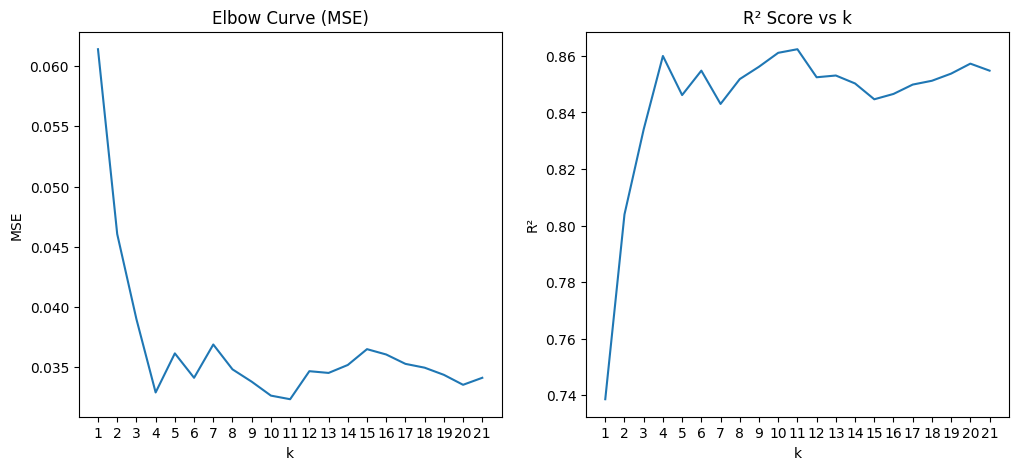

In [16]:
#設置圖表標籤和標題
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.xlabel("k") 
plt.ylabel("MSE")
plt.title("Elbow Curve (MSE)")
plt.plot(k_values, mse_val)
plt.xticks(k_values)

plt.subplot(1, 2, 2)
plt.xlabel("k") 
plt.ylabel("R²")
plt.title("R² Score vs k")
plt.plot(k_values, r2_val)
plt.xticks(k_values)

plt.show()